In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

In [3]:
X,y = make_moons(100,noise=0.2,random_state=2)

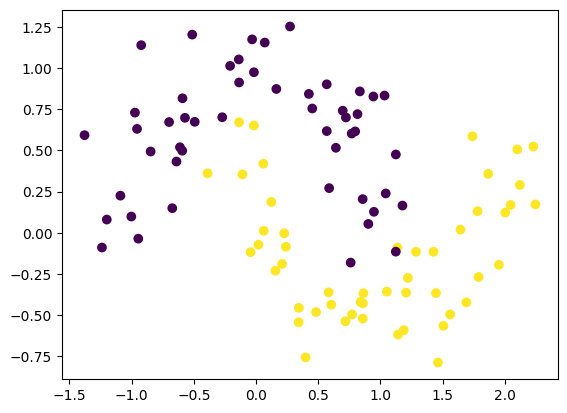

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
model_1 = Sequential()
model_1.add(Dense(128,input_dim=2,activation="relu")) 
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate = 0.01)

In [12]:

model_1.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
history = model_1.fit(X,y,validation_split=0.2,epochs=2000,verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step


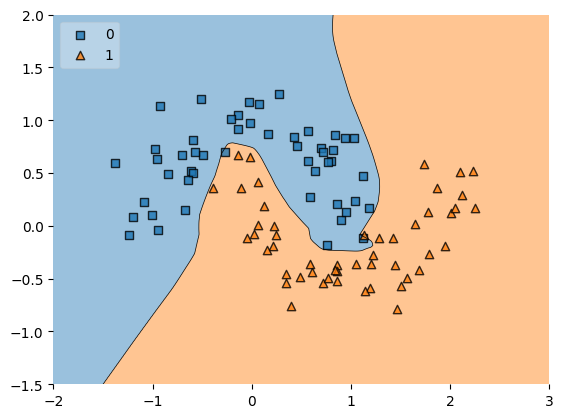

In [17]:
plot_decision_regions(X,y,clf=model_1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [19]:
model_2 = Sequential()
model_2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03))) 
model_2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model_2.add(Dense(1,activation="sigmoid"))

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
adam = Adam(learning_rate=0.01)
model_2.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

In [22]:
history2 = model_2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

In [ ]:
plot_decision_regions(X,y,clf=model_2,legend=2)